#**1. Import thư viện**

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from category_encoders import BinaryEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
features= pd.read_csv("/content/features.csv")

In [ ]:
store=pd.read_csv("/content/stores.csv")

In [ ]:
test=pd.read_csv("/content/test.csv")

In [ ]:
train=pd.read_csv("/content/train.csv")

In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2/5/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2/12/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2/19/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2/26/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,3/5/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,11/2/2012,False
1,1,1,11/9/2012,False
2,1,1,11/16/2012,False
3,1,1,11/23/2012,True
4,1,1,11/30/2012,False


In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2/5/2010,24924.50,False
1,1,1,2/12/2010,46039.49,True
2,1,1,2/19/2010,41595.55,False
3,1,1,2/26/2010,19403.54,False
4,1,1,3/5/2010,21827.90,False


##**2.Clean data**

###Gộp dữ liệu###

In [ ]:
# Chuyển đổi cột 'Date' của cả train và features sang datetime64[ns]
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])
test['Date']=pd.to_datetime(test['Date'])

# Thực hiện phép gộp sau khi chuyển đổi kiểu dữ liệu
data = train.merge(features, on=['Store', 'Date'], how='inner').merge(store, on=['Store'], how='inner')

# Hiển thị 5 hàng đầu tiên của DataFrame kết quả
data.head(5)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [ ]:
# Chuyển đổi cột 'Date' sang datetime64[ns] cho tất cả các DataFrame
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# Gộp features và store trước
feature_store = features.merge(store, how='inner', on='Store')

# Gộp train với feature_store dựa trên các cột 'Store', 'Date'
train_merged = train.merge(feature_store, how='inner', on=['Store', 'Date'])

# Gộp test với feature_store dựa trên các cột 'Store', 'Date'
test_merged = test.merge(feature_store, how='inner', on=['Store', 'Date'])

# Gộp train_merged và test_merged vào một DataFrame duy nhất
data = pd.concat([train_merged, test_merged], ignore_index=True) #"combined data"

# Hiển thị 5 hàng đầu tiên của DataFrame kết quả
print(data.head())


   Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50        False        42.31       2.572   
1      1     2 2010-02-05      50605.27        False        42.31       2.572   
2      1     3 2010-02-05      13740.12        False        42.31       2.572   
3      1     4 2010-02-05      39954.04        False        42.31       2.572   
4      1     5 2010-02-05      32229.38        False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.096358   
2        NaN        NaN        NaN        NaN        NaN  211.096358   
3        NaN        NaN        NaN        NaN        NaN  211.096358   
4        NaN        NaN        NaN        NaN        NaN  211.096358   

   Unemployment  IsHoliday_y Type    Size  
0         8.106        False    A  1

In [ ]:
data.drop(['IsHoliday_y'], axis=1,inplace=True)
data.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [ ]:
data['Store'].nunique()


45

In [ ]:
data['Dept'].nunique()

81

In [ ]:
# Lấy 5 hàng đầu tiên từ cột 'Date'
head_dates = data['Date'].head(5)
# Lấy 5 hàng cuối cùng từ cột 'Date'
tail_dates = data['Date'].tail(5)
# Nối hai Series lại với nhau
combined_dates = pd.concat([head_dates, tail_dates])
# In ra kết quả
print(combined_dates)


0        2010-02-05
1        2010-02-05
2        2010-02-05
3        2010-02-05
4        2010-02-05
536629   2013-07-26
536630   2013-07-26
536631   2013-07-26
536632   2013-07-26
536633   2013-07-26
Name: Date, dtype: datetime64[ns]


In [ ]:
data.replace({'A': 1, 'B': 2,'C':3},inplace=True)

In [ ]:
data.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales    115064
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       271038
MarkDown2       338949
MarkDown3       294308
MarkDown4       299491
MarkDown5       270138
CPI              38162
Unemployment     38162
Type                 0
Size                 0
dtype: int64

In [ ]:
data.dropna(axis=0, how='any', inplace=True)  # Loại bỏ các hàng có bất kỳ giá trị thiếu nào
data.dropna(axis=1, how='any', inplace=True)  # Loại bỏ các cột có bất kỳ giá trị thiếu nào


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97056 entries, 6587 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         97056 non-null  int64         
 1   Dept          97056 non-null  int64         
 2   Date          97056 non-null  datetime64[ns]
 3   Weekly_Sales  97056 non-null  float64       
 4   IsHoliday     97056 non-null  bool          
 5   Temperature   97056 non-null  float64       
 6   Fuel_Price    97056 non-null  float64       
 7   MarkDown1     97056 non-null  float64       
 8   MarkDown2     97056 non-null  float64       
 9   MarkDown3     97056 non-null  float64       
 10  MarkDown4     97056 non-null  float64       
 11  MarkDown5     97056 non-null  float64       
 12  CPI           97056 non-null  float64       
 13  Unemployment  97056 non-null  float64       
 14  Type          97056 non-null  int64         
 15  Size          97056 non-null  int64  

In [ ]:
data.to_excel('clean_data.xlsx', index=False)  # index=False để không lưu cột index


In [ ]:
data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

##**3. Data Correlation**##

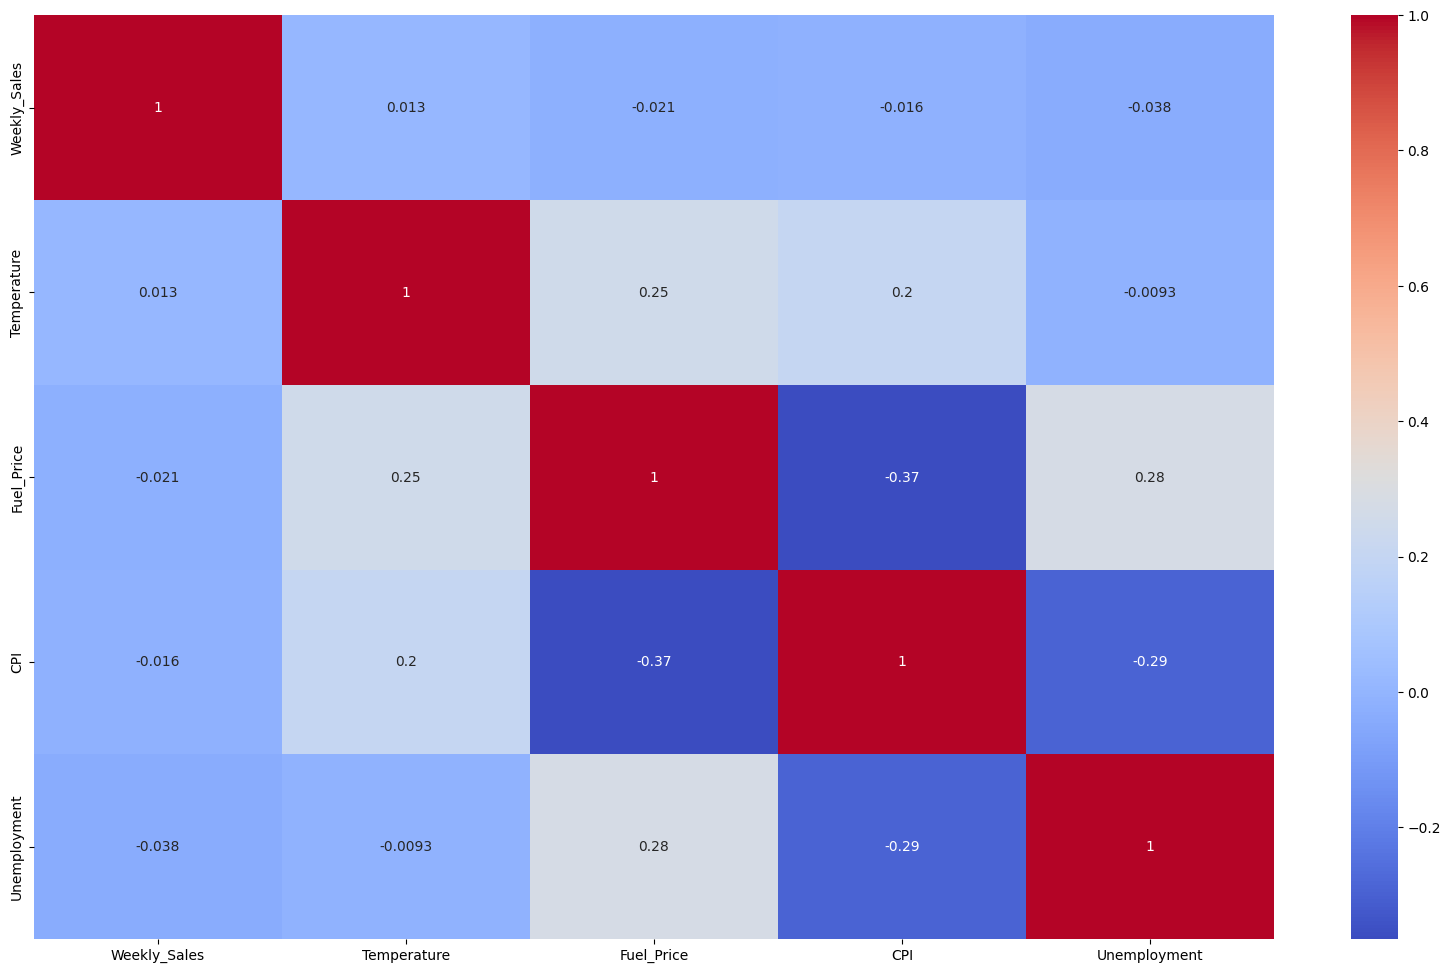

In [ ]:
plt.figure(figsize = (20, 12))
sns.heatmap(data[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr(), annot = True, cmap='coolwarm')
plt.show()

##**4.Data Processing**##

##**Model**

In [ ]:
num_features = data.select_dtypes(include=['int64', 'float64']).columns.to_list()
num_features.remove('Weekly_Sales')
cat_features = data.select_dtypes(include=['object']).columns.to_list()

In [ ]:
X = data.drop('Weekly_Sales', axis=1)
y = data['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_features),
        ('cat', BinaryEncoder(), cat_features)
    ])


In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

In [ ]:
print("Linear Regression:")
print("MAE (Train):", mean_absolute_error(y_train, y_train_pred_lr))
print("MSE (Train):", mean_squared_error(y_train, y_train_pred_lr))
print("R^2 (Train):", r2_score(y_train, y_train_pred_lr))
print("MAE (Test):", mean_absolute_error(y_test, y_test_pred_lr))
print("MSE (Test):", mean_squared_error(y_test, y_test_pred_lr))
print("R^2 (Test):", r2_score(y_test, y_test_pred_lr))

Linear Regression:
MAE (Train): 16073.308913856128
MSE (Train): 557806986.5629182
R^2 (Train): 0.07647822948931982
MAE (Test): 16069.931187043374
MSE (Test): 579464530.4118108
R^2 (Test): 0.07958568383908526


- The Linear Regression model has poor performance, with a very low R^2 value (about 0.08), which indicates that the model only explains 8% of the variation in the training and testing data.
- The MAE and MSE are high for both the training and test sets, indicating large prediction errors.

Random Forest

In [ ]:
rf_model = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

In [ ]:
print("\nRandom Forest Regressor:")
print("MAE (Train):", mean_absolute_error(y_train, y_train_pred_rf))
print("MSE (Train):", mean_squared_error(y_train, y_train_pred_rf))
print("R^2 (Train):", r2_score(y_train, y_train_pred_rf))
print("MAE (Test):", mean_absolute_error(y_test, y_test_pred_rf))
print("MSE (Test):", mean_squared_error(y_test, y_test_pred_rf))
print("R^2 (Test):", r2_score(y_test, y_test_pred_rf))


Random Forest Regressor:
MAE (Train): 4214.924437676221
MSE (Train): 52678364.152005404
R^2 (Train): 0.9127841398526856
MAE (Test): 4504.315384239945
MSE (Test): 69710860.55815813
R^2 (Test): 0.8892721285217802


- The Random Forest Regressor model has very good performance, with R^2 on the training and test sets being 0.9128 and 0.8893, respectively, indicating that the model explains about 89% of the variation in the test data.
- MAE and MSE are significantly lower than Linear Regression, indicating that this model is more accurate in its predictions.

Gradient Boosting Regressor

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
y_train_pred_gb = gb_model.predict(X_train)
y_test_pred_gb = gb_model.predict(X_test)

In [ ]:
print("\nGradient Boosting Regressor:")
print("MAE (Train):", mean_absolute_error(y_train, y_train_pred_gb))
print("MSE (Train):", mean_squared_error(y_train, y_train_pred_gb))
print("R^2 (Train):", r2_score(y_train, y_train_pred_gb))
print("MAE (Test):", mean_absolute_error(y_test, y_test_pred_gb))
print("MSE (Test):", mean_squared_error(y_test, y_test_pred_gb))
print("R^2 (Test):", r2_score(y_test, y_test_pred_gb))


Gradient Boosting Regressor:
MAE (Train): 7278.968425805837
MSE (Train): 140291461.2220332
R^2 (Train): 0.7677293010371994
MAE (Test): 7383.64541850957
MSE (Test): 158626681.3631622
R^2 (Test): 0.7480393349563775


- The Gradient Boosting Regressor model also performed quite well, with R^2 on the training and test sets being 0.7677 and 0.7480, respectively.
- The MAE and MSE of this model are lower than Linear Regression but higher than Random Forest Regressor.

XGBoost Regressor

In [ ]:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

In [ ]:
print("\nXGBoost Regressor:")
print("MAE (Train):", mean_absolute_error(y_train, y_train_pred_xgb))
print("MSE (Train):", mean_squared_error(y_train, y_train_pred_xgb))
print("R^2 (Train):", r2_score(y_train, y_train_pred_xgb))
print("MAE (Test):", mean_absolute_error(y_test, y_test_pred_xgb))
print("MSE (Test):", mean_squared_error(y_test, y_test_pred_xgb))
print("R^2 (Test):", r2_score(y_test, y_test_pred_xgb))


XGBoost Regressor:
MAE (Train): 2984.6385654969095
MSE (Train): 22661500.561522525
R^2 (Train): 0.9624809483833071
MAE (Test): 3388.1545879240475
MSE (Test): 38827892.66969141
R^2 (Test): 0.9383262539742588


- The XGBoost Regressor model has the best performance of the tested models, with R^2 on the training and test sets of 0.9625 and 0.9383, respectively, indicating that the model explains about 94% of the variation in test data.
- MAE and MSE are the lowest among the models, indicating that this model has the smallest prediction error.

**Conclusion**:
- XGBoost Regressor is the best performing model with the highest R^2 and lowest MAE and MSE, indicating that it is the most accurate model for this problem.
- Random Forest Regressor is also a good choice, with performance close to XGBoost.
- Gradient Boosting Regressor has decent performance but not as good as the above two models.
- Linear Regression has the worst performance and is not suitable for this problem.
=> Based on these results, it is recommended to use XGBoost Regressor or Random Forest Regressor to predict Walmart's weekly sales.